In [31]:
import arrow as arw
import datetime
from erddapy import ERDDAP
import gsw
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns

from salishsea_tools import places, teos_tools

%matplotlib inline

# Get Observations

In [27]:
server = "https://salishsea.eos.ubc.ca/erddap"
protocol = 'tabledap'
dataset_ids = ["ubcONCSCVIPCTD15mV1", "ubcONCSEVIPCTD15mV1", "ubcONCLSBBLCTD15mV1", "ubcONCUSDDLCTD15mV1"]
nodes = ["Central node", "Delta BBL node", "Delta DDL node", "East node"]

In [23]:
variables = [
            "latitude",
            "longitude",
            "temperature",
            "salinity",
            "time",
            "depth",
        ]

In [25]:
start_date = '2015-01-01T00:00:00Z'
end_date = '2018-12-31T23:30:00Z'

constraints = {
    "time>=": start_date,
    "time<=": end_date,
    }


In [35]:
obs = ERDDAP(server=server, protocol=protocol)
obs.dataset_id = dataset_ids[0]
obs.variables = variables
obs.constraints = constraints
sal_obs = obs.to_pandas(index_col="time (UTC)", parse_dates=True,).dropna()
sal_obs['conservative temperature (oC)'] = gsw.CT_from_pt(sal_obs['salinity (g/kg)'], sal_obs['temperature (degrees_Celcius)'] )
sal_obs['dtUTC'] = sal_obs.index.tz_localize(None)

In [36]:
sal_obs

,latitude (degrees_north),longitude (degrees_east),temperature (degrees_Celcius),salinity (g/kg),depth (m),conservative temperature (oC),dtUTC
time (UTC),,,,,,,
2015-01-01 00:00:00+00:00,49.040067,-123.425825,9.382127,31.281386,294,9.439521,2015-01-01 00:00:00
2015-01-01 00:15:00+00:00,49.040067,-123.425825,9.380800,31.282002,294,9.438177,2015-01-01 00:15:00
2015-01-01 00:30:00+00:00,49.040067,-123.425825,9.376987,31.283275,294,9.434324,2015-01-01 00:30:00
2015-01-01 00:45:00+00:00,49.040067,-123.425825,9.370100,31.285338,294,9.427370,2015-01-01 00:45:00
2015-01-01 01:00:00+00:00,49.040067,-123.425825,9.365593,31.286671,294,9.422819,2015-01-01 01:00:00
...,...,...,...,...,...,...,...
2018-12-31 22:30:00+00:00,49.040067,-123.425825,9.773498,31.397133,294,9.830717,2018-12-31 22:30:00
2018-12-31 22:45:00+00:00,49.040067,-123.425825,9.773646,31.397576,294,9.830857,2018-12-31 22:45:00
2018-12-31 23:00:00+00:00,49.040067,-123.425825,9.773969,31.399504,294,9.831148,2018-12-31 23:00:00


In [37]:
sal_obs_hourly = sal_obs.resample('1H').mean()

In [80]:
obs = ERDDAP(server=server, protocol=protocol)
obs.dataset_id = dataset_ids[1]
obs.variables = variables
obs.constraints = constraints
east_obs = obs.to_pandas(index_col="time (UTC)", parse_dates=True,).dropna()
east_obs['conservative temperature (oC)'] = gsw.CT_from_pt(east_obs['salinity (g/kg)'], east_obs['temperature (degrees_Celcius)'] )
east_obs['dtUTC'] = east_obs.index.tz_localize(None)
east_obs_hourly = east_obs.resample('1H').mean()

In [47]:
obs = ERDDAP(server=server, protocol=protocol)
obs.dataset_id = dataset_ids[2]
obs.variables = variables
obs.constraints = constraints
bbl_obs = obs.to_pandas(index_col="time (UTC)", parse_dates=True,).dropna()
bbl_obs['conservative temperature (oC)'] = gsw.CT_from_pt(bbl_obs['salinity (g/kg)'], bbl_obs['temperature (degrees_Celcius)'] )
bbl_obs['dtUTC'] = bbl_obs.index.tz_localize(None)
bbl_obs_hourly = bbl_obs.resample('1H').mean()

In [48]:
obs = ERDDAP(server=server, protocol=protocol)
obs.dataset_id = dataset_ids[3]
obs.variables = variables
obs.constraints = constraints
ddl_obs = obs.to_pandas(index_col="time (UTC)", parse_dates=True,).dropna()
ddl_obs['conservative temperature (oC)'] = gsw.CT_from_pt(ddl_obs['salinity (g/kg)'], ddl_obs['temperature (degrees_Celcius)'] )
ddl_obs['dtUTC'] = ddl_obs.index.tz_localize(None)
ddl_obs_hourly = ddl_obs.resample('1H').mean()

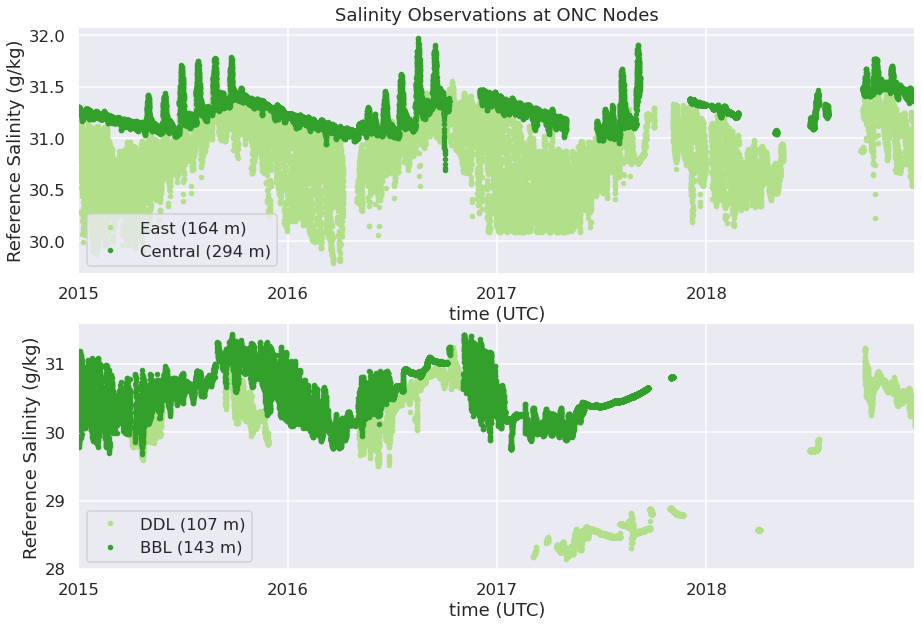

In [81]:
sns.set(color_codes=True)
sns.set_context("talk")
sns.set_palette(sns.color_palette("Paired"))
myp = sns.color_palette()
fig, axs = plt.subplots(2, 1, figsize=(15, 10)) 
ddl_obs_hourly['salinity (g/kg)'].plot(ax=axs[1], label='DDL (107 m)', color=myp[2], marker='.', linewidth=0) 
bbl_obs_hourly['salinity (g/kg)'].plot(ax=axs[1], label='BBL (143 m)', color=myp[3], marker='.', linewidth=0) 
east_obs_hourly['salinity (g/kg)'].plot(ax=axs[0], label='East (164 m)', color=myp[2], marker='.', linewidth=0)  
sal_obs_hourly['salinity (g/kg)'].plot(
    ax=axs[0], label='Central (294 m)', color=myp[3], marker='.', linewidth=0) 
for ax in [axs[0], axs[1]]:
    ax.set_ylabel('Reference Salinity (g/kg)')
    ax.legend(loc='lower left')
axs[0].set_title('Salinity Observations at ONC Nodes');


# Get Model Results

In [54]:
placename = ''
use_title = 'Salinity at VENUS Central'


In [ ]:
from datetime import datetime, timedelta
start = datetime(1970, 1, 1)  # Unix epoch start time
df['datetime'] = df.Time.apply(lambda x: start + timedelta(seconds=x))

(3, 744)


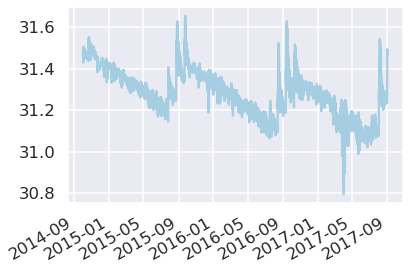

In [70]:
timeseries = '/home/sallen/MEOPAR/ANALYSIS/analysis-susan_hg/notebooks/TimeSeries/NowcastGreen1702'
tail = '.npy'
model_results = np.load(timeseries + placename + 'oct14' + tail)
print (model_results.shape)
for smonth in ['nov14', 'dec14', 'jan15', 'feb15', 'mar15', 
               'apr15', 'may15', 'jun15', 'jul15', 'aug15', 'sep15', 
               'oct15', 'nov15', 'dec15', 'jan16', 'feb16', 'mar16', 'apr16', 'may16', 
               'jun16', 'jul16', 'aug16', 'sep16', 'oct16', 'nov16',
               'dec16', 'jan17', 'feb17', 'mar17', 'apr17', 'may17', 
               'jun17', 'jul17', 'aug17']:
    model_results = np.append(model_results, np.load(timeseries + placename + smonth + tail), axis=1)

start = datetime.datetime(1900, 1, 1)
sal_model = pd.Series(model_results[1], index=model_results[0])
sal_model.index = pd.to_datetime(sal_model.index, unit='s', origin=start)
sal_model.plot();

# Do Comparison Plot

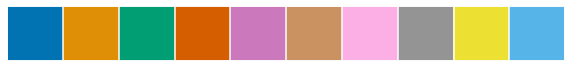

In [73]:
sns.set_palette(sns.color_palette("colorblind"))
mpy = sns.color_palette('colorblind')
sns.palplot(myp)
iobs = 2
i1702 = 0
iH18 = 3
iv3 = 4

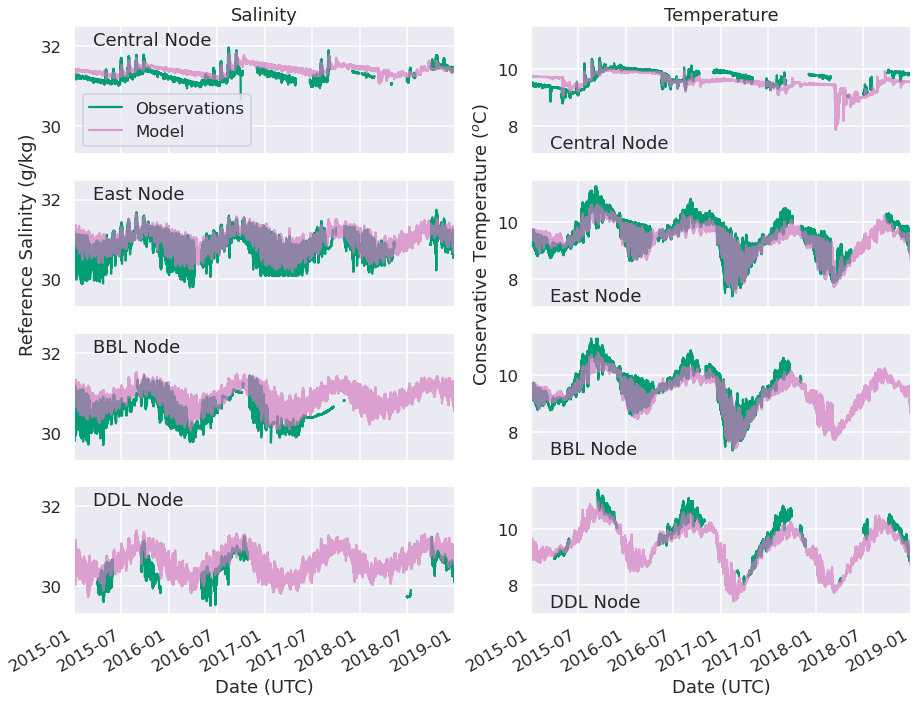

In [95]:
directory = '/home/sallen/MEOPAR/ANALYSIS/analysis-susan_hg/notebooks/TimeSeries/'
vtimeseries0 = 'Hindcast201806v3_0'
vtimeseries = 'Hindcast201806v3_1'
vtimeseries2 = 'Hindcast201806v3_2'
vtimeseries3 = 'Hindcast201806v3_3'
vtimeseries4 = 'Hindcast201806v3_4'
tail = '.npy'

fig, axs = plt.subplots(4, 2, figsize=(15, 12))
for count, placename in enumerate(['', 'East', 'BBL', 'DDL']):          

    H18v3_model_results = np.load(directory + vtimeseries0 + placename+ 'nov14' + tail)
    H18v3_model_results = np.append(H18v3_model_results, np.load(directory + vtimeseries0 +placename+ 'dec14' + tail), axis=1)

    for smonth in ['jan15', 'feb15', 'mar15', 'apr15', 'may15', 
               'jun15', 'jul15', 'aug15', 'sep15', 'oct15', 'nov15',
               'dec15',
              ]:
        H18v3_model_results = np.append(H18v3_model_results, np.load(directory + vtimeseries +placename+ smonth + tail), axis=1)
    for smonth in ['jan16', 'feb16', 'mar16', 'apr16', 'may16', 'jun16', 'jul16',
                  'aug16', 'sep16', 'oct16', 'nov16', 'dec16']:
        H18v3_model_results = np.append(H18v3_model_results, np.load(directory + vtimeseries +placename+ smonth + tail), axis=1)
    for smonth in ['jan17', 'feb17', 'mar17', 'apr17', 'may17', 'jun17',
                 'jul17', 'aug17', 'sep17', 'oct17', 'nov17', 'dec17'
                  ]:
        H18v3_model_results = np.append(H18v3_model_results, np.load(directory + vtimeseries3 +placename+ smonth + tail), axis=1)
    for smonth in ['jan18', 'feb18', 'mar18', 'apr18', 'may18', 'jun18',
                 'jul18', 'aug18', 'sep18', 'oct18', 'nov18', 'dec18'
                  ]:
        H18v3_model_results = np.append(H18v3_model_results, np.load(directory + vtimeseries4 +placename+ smonth + tail), axis=1)
        
    
    H18v3_sal_model = pd.Series(H18v3_model_results[1], index=H18v3_model_results[0])
    H18v3_sal_model.index = pd.to_datetime(H18v3_sal_model.index, unit='s', origin=datetime.datetime(1900, 1, 1))
    
    H18v3_temp_model = pd.Series(H18v3_model_results[2], index=H18v3_model_results[0])
    H18v3_temp_model.index = pd.to_datetime(H18v3_temp_model.index, unit='s', origin=datetime.datetime(1900, 1, 1))

    sns.set_palette(sns.color_palette("colorblind"))
    myp = sns.color_palette()

    H18v3_sal_model.plot(ax=axs[count, 0], label='', color='white')
    if placename == 'East':
        east_obs_hourly['salinity (g/kg)'].plot(ax=axs[count, 0], label='Observations', color=myp[iobs])
        axs[count, 0].text(0.05, 0.85, 'East Node', transform=axs[count, 0].transAxes)
    elif placename == 'BBL':
        bbl_obs_hourly['salinity (g/kg)'].plot(ax=axs[count, 0], label='Observations', color=myp[iobs])
        axs[count, 0].text(0.05, 0.85, 'BBL Node', transform=axs[count, 0].transAxes)
    elif placename == 'DDL':
        ddl_obs_hourly['salinity (g/kg)'].plot(ax=axs[count, 0], label='Observations', color=myp[iobs])
        axs[count, 0].text(0.05, 0.85, 'DDL Node', transform=axs[count, 0].transAxes)
    else:
        sal_obs_hourly['salinity (g/kg)'].plot(ax=axs[count, 0], label='Observations', color=myp[iobs])
        axs[count, 0].text(0.05, 0.85, 'Central Node', transform=axs[count, 0].transAxes)
    H18v3_sal_model.plot(ax=axs[count, 0], label='Model', color=myp[iv3], alpha=0.7)

    H18v3_temp_model.plot(ax=axs[count, 1], label='', color='white')
    if placename == 'East': 
        east_obs_hourly['conservative temperature (oC)'].plot(ax=axs[count, 1], label='Observations', color=myp[iobs])
        axs[count, 1].text(0.05, 0.05, 'East Node', transform=axs[count, 1].transAxes)
    elif placename == 'BBL':
        bbl_obs_hourly['conservative temperature (oC)'].plot(ax=axs[count, 1], label='Observations', color=myp[iobs])
        axs[count, 1].text(0.05, 0.05, 'BBL Node', transform=axs[count, 1].transAxes)
    elif placename == 'DDL':
        ddl_obs_hourly['conservative temperature (oC)'].plot(ax=axs[count, 1], label='Observations', color=myp[iobs])
        axs[count, 1].text(0.05, 0.05, 'DDL Node', transform=axs[count, 1].transAxes)
    else:
        sal_obs_hourly['conservative temperature (oC)'].plot(ax=axs[count, 1], label='Observations', color=myp[iobs])
        axs[count, 1].text(0.05, 0.05, 'Central Node', transform=axs[count, 1].transAxes)

    H18v3_temp_model.plot(ax=axs[count, 1], label='Model', color=myp[iv3], alpha=0.7)
    
axs[1, 1].set_ylabel('Conservative Temperature ($^o$C)')
axs[1, 0].set_ylabel('Reference Salinity (g/kg)')
    

axs[3, 0].set_xlabel('Date (UTC)')
axs[3, 1].set_xlabel('Date (UTC)')
axs[0, 0].set_title('Salinity')
axs[0, 1].set_title('Temperature')
    
axs[0, 0].legend(loc='lower left', ncol=1)

for j in range(3):
    for i in range(2):
        axs[j, i].set_xticklabels([])
        axs[j, i].set_xlabel('')
    
for j in range(4):
    axs[j, 1].set_ylim((7, 11.5));
    axs[j, 0].set_ylim((29.3, 32.5));
    for i in range(2):
        axs[j, i].set_xlim((datetime.datetime(2015, 1, 1), datetime.datetime(2019, 1, 1)))
plt.savefig('ONC_comparison.pdf')
plt.savefig('ONC_comparison.png')

# New Hindcast: Model VENUS Comparison

In [ ]:
timeseries = 'Hindcast201806'
timeseries2 = 'Hindcast201806_p2'
timeseries3 = 'Hindcast201806_p3'
tail = '.npy'

fig, axs = plt.subplots(2, 4, figsize=(15, 7))
for count, placename in enumerate(['', 'East', 'BBL', 'DDL']):          

    H18_model_results = np.load(timeseries +placename+ 'nov14' + tail)
    for smonth in ['dec14', 'jan15','feb15', 'mar15', 'apr15', 'may15', 
               'jun15', 'jul15', 'aug15', 'sep15', 'oct15', 'nov15',
               'dec15',
              ]:
        H18_model_results = np.append(H18_model_results, np.load(timeseries +placename+ smonth + tail), axis=1)
    for smonth in ['jan16', 'feb16', 'mar16', 'apr16', 'may16', 'jun16', 'jul16',
                  'aug16', 'sep16', 'oct16', 'nov16', 'dec16']:
        H18_model_results = np.append(H18_model_results, np.load(timeseries2 +placename+ smonth + tail), axis=1)
    for smonth in ['jan17', 'feb17', 'mar17', 'apr17', 'may17', 'jun17',
                  'jul17', 'aug17', 'sep17', 'oct17', 'nov17', 'dec17']:
        H18_model_results = np.append(H18_model_results, np.load(timeseries3 +placename+ smonth + tail), axis=1)        

    jpH18 = nc.num2date(H18_model_results[0], ncunits)
    H18_sal_model = pd.Series(H18_model_results[1], index=jpH18)
    H18_temp_model = pd.Series(H18_model_results[2], index=jpH18)

    sns.set_palette(sns.color_palette("colorblind"))
    myp = sns.color_palette()
    
    if placename == 'East':
        start = max(east_sal_obs_hourly.index.min(), H18_sal_model.index.min())
        end = min(east_sal_obs_hourly.index.max(), H18_sal_model.index.max())
        df_time = pd.DataFrame({'time': pd.date_range(start, end, freq='1h')})
        df_A = east_sal_obs_hourly.reset_index()
        df_B = H18_sal_model.reset_index()
        df_A.columns = ['time', 'value']
        df_B.columns = ['time', 'value']
        merged = pd.merge_asof(pd.merge_asof(df_time, df_A, on='time'), df_B, on='time', suffixes=('_obs', '_mod'))
        axs[0, count].scatter(merged.value_obs, merged.value_mod, c=merged.time, cmap='plasma')
        axs[0, count].plot(np.arange(29.5, 32.5, 0.5), np.arange(29.5, 32.5, 0.5), 'k')
        
        start = max(east_temp_obs_hourly.index.min(), H18_sal_model.index.min())
        end = min(east_temp_obs_hourly.index.max(), H18_sal_model.index.max())
        df_time = pd.DataFrame({'time': pd.date_range(start, end, freq='1h')})
        df_A = east_temp_obs_hourly.reset_index()
        df_B = H18_temp_model.reset_index()
        df_A.columns = ['time', 'value']
        df_B.columns = ['time', 'value']
        mergedt = pd.merge_asof(pd.merge_asof(df_time, df_A, on='time'), df_B, on='time', suffixes=('_obs', '_mod'))
        axs[1, count].scatter(mergedt.value_obs, mergedt.value_mod, c=mergedt.time, cmap='plasma')
        axs[1, count].plot(np.arange(7, 12, 0.5), np.arange(7, 12, 0.5), 'k')
    elif placename == 'BBL':
        start = max(bbl_sal_obs_hourly.index.min(), H18_sal_model.index.min())
        end = min(bbl_sal_obs_hourly.index.max(), H18_sal_model.index.max())
        df_time = pd.DataFrame({'time': pd.date_range(start, end, freq='1h')})
        df_A = bbl_sal_obs_hourly.reset_index()
        df_B = H18_sal_model.reset_index()
        df_A.columns = ['time', 'value']
        df_B.columns = ['time', 'value']
        merged = pd.merge_asof(pd.merge_asof(df_time, df_A, on='time'), df_B, on='time', suffixes=('_obs', '_mod'))
        axs[0, count].scatter(merged.value_obs, merged.value_mod, c=merged.time, cmap='plasma')
        axs[0, count].plot(np.arange(29.5, 32.5, 0.5), np.arange(29.5, 32.5, 0.5), 'k')
        
        start = max(bbl_temp_obs_hourly.index.min(), H18_sal_model.index.min())
        end = min(bbl_temp_obs_hourly.index.max(), H18_sal_model.index.max())
        df_time = pd.DataFrame({'time': pd.date_range(start, end, freq='1h')})
        df_A = bbl_temp_obs_hourly.reset_index()
        df_B = H18_temp_model.reset_index()
        df_A.columns = ['time', 'value']
        df_B.columns = ['time', 'value']
        mergedt = pd.merge_asof(pd.merge_asof(df_time, df_A, on='time'), df_B, on='time', suffixes=('_obs', '_mod'))
        axs[1, count].scatter(mergedt.value_obs, mergedt.value_mod, c=mergedt.time, cmap='plasma')
        axs[1, count].plot(np.arange(7, 12, 0.5), np.arange(7, 12, 0.5), 'k')
    elif placename == 'DDL':
        start = max(ddl_sal_obs_hourly.index.min(), H18_sal_model.index.min())
        end = min(ddl_sal_obs_hourly.index.max(), H18_sal_model.index.max())
        df_time = pd.DataFrame({'time': pd.date_range(start, end, freq='1h')})
        df_A = ddl_sal_obs_hourly.reset_index()
        df_B = H18_sal_model.reset_index()
        df_A.columns = ['time', 'value']
        df_B.columns = ['time', 'value']
        merged = pd.merge_asof(pd.merge_asof(df_time, df_A, on='time'), df_B, on='time', suffixes=('_obs', '_mod'))
        axs[0, count].scatter(merged.value_obs, merged.value_mod, c=merged.time, cmap='plasma')
        axs[0, count].plot(np.arange(29.5, 32.5, 0.5), np.arange(29.5, 32.5, 0.5), 'k')
        
        start = max(ddl_temp_obs_hourly.index.min(), H18_sal_model.index.min())
        end = min(ddl_temp_obs_hourly.index.max(), H18_sal_model.index.max())
        df_time = pd.DataFrame({'time': pd.date_range(start, end, freq='1h')})
        df_A = ddl_temp_obs_hourly.reset_index()
        df_B = H18_temp_model.reset_index()
        df_A.columns = ['time', 'value']
        df_B.columns = ['time', 'value']
        mergedt = pd.merge_asof(pd.merge_asof(df_time, df_A, on='time'), df_B, on='time', suffixes=('_obs', '_mod'))
        axs[1, count].scatter(mergedt.value_obs, mergedt.value_mod, c=mergedt.time, cmap='plasma')
        axs[1, count].plot(np.arange(7, 12, 0.5), np.arange(7, 12, 0.5), 'k')
    else:
        start = max(sal_obs_hourly.index.min(), H18_sal_model.index.min())
        end = min(sal_obs_hourly.index.max(), H18_sal_model.index.max())
        df_time = pd.DataFrame({'time': pd.date_range(start, end, freq='1h')})
        df_A = sal_obs_hourly.reset_index()
        df_B = H18_sal_model.reset_index()
        df_A.columns = ['time', 'value']
        df_B.columns = ['time', 'value']
        merged = pd.merge_asof(pd.merge_asof(df_time, df_A, on='time'), df_B, on='time', suffixes=('_obs', '_mod'))
        axs[0, count].scatter(merged.value_obs, merged.value_mod, c=merged.time, cmap='plasma')
        axs[0, count].plot(np.arange(29.5, 32.5, 0.5), np.arange(29.5, 32.5, 0.5), 'k')
        
        start = max(temp_obs_hourly.index.min(), H18_sal_model.index.min())
        end = min(temp_obs_hourly.index.max(), H18_sal_model.index.max())
        df_time = pd.DataFrame({'time': pd.date_range(start, end, freq='1h')})
        df_A = temp_obs_hourly.reset_index()
        df_B = H18_temp_model.reset_index()
        df_A.columns = ['time', 'value']
        df_B.columns = ['time', 'value']
        mergedt = pd.merge_asof(pd.merge_asof(df_time, df_A, on='time'), df_B, on='time', suffixes=('_obs', '_mod'))
        axs[1, count].scatter(mergedt.value_obs, mergedt.value_mod, c=mergedt.time, cmap='plasma')
        axs[1, count].plot(np.arange(7, 12, 0.5), np.arange(7, 12, 0.5), 'k')
    mse =  ((merged.value_mod - merged.value_obs) **2).mean() 
    bias = merged.value_mod.mean() - merged.value_obs.mean()
    Willmott = 1 - mse/(((merged.value_mod - merged.value_obs.mean()).abs() + 
                        (merged.value_obs - merged.value_obs.mean()).abs())**2).mean()
    axs[0, count].text(29.2, 32.2, 'RMSE = %.2f' % mse ** 0.5)
    axs[0, count].text(29.2, 31.9, 'bias = %.2f' % bias)
    axs[0, count].text(29.2, 31.6, 'WS = %.2f' % Willmott)
    mse =  ((mergedt.value_mod - mergedt.value_obs) **2).mean() 
    bias = mergedt.value_mod.mean() - mergedt.value_obs.mean()
    Willmott = 1 - mse/(((mergedt.value_mod - mergedt.value_obs.mean()).abs() + 
                        (mergedt.value_obs - mergedt.value_obs.mean()).abs())**2).mean()
    axs[1, count].text(6.3, 11.5, 'RMSE = %.2f' % mse ** 0.5)
    axs[1, count].text(6.3, 11, 'bias = %.2f' % bias)
    axs[1, count].text(6.3, 10.5, 'WS = %.2f' % Willmott)

In [ ]:
timeseries = 'Hindcast201806'
timeseries2 = 'Hindcast201806_p2'
timeseries3 = 'Hindcast201806_p3'
tail = '.npy'

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for count, placename in enumerate(['', 'East', 'BBL', 'DDL']):          

    H18_model_results = np.load(timeseries +placename+ 'nov14' + tail)
    for smonth in ['dec14', 'jan15','feb15', 'mar15', 'apr15', 'may15', 
               'jun15', 'jul15', 'aug15', 'sep15', 'oct15', 'nov15',
               'dec15', 
              ]:
        H18_model_results = np.append(H18_model_results, np.load(timeseries +placename+ smonth + tail), axis=1)
    for smonth in ['jan16', 'feb16', 'mar16', 'apr16', 'may16', 'jun16', 'jul16',
                  'aug16', 'sep16', 'oct16', 'nov16', 'dec16']:
        H18_model_results = np.append(H18_model_results, np.load(timeseries2 +placename+ smonth + tail), axis=1)
    for smonth in ['jan17', 'feb17', 'mar17', 'apr17', 'may17', 'jun17',
                  'jul17', 'aug17', 'sep17', 'oct17', 'nov17', 'dec17']:
        H18_model_results = np.append(H18_model_results, np.load(timeseries3 +placename+ smonth + tail), axis=1)

    jpH18 = nc.num2date(H18_model_results[0], ncunits)
    H18_sal_model = pd.Series(H18_model_results[1], index=jpH18)
    H18_temp_model = pd.Series(H18_model_results[2], index=jpH18)

    sns.set_palette(sns.color_palette("colorblind"))
    myp = sns.color_palette()
    
    if placename == 'East':
        (H18_sal_model.resample('H').interpolate() - east_sal_obs_hourly).plot(ax=axs[0, count])
        (H18_sal_model.resample('H').interpolate() - east_sal_obs_hourly).resample('M').mean().plot(ax=axs[0, count], marker='o')
        
        (H18_temp_model.resample('H').interpolate() - east_temp_obs_hourly).plot(ax=axs[1, count])
        (H18_temp_model.resample('H').interpolate() - east_temp_obs_hourly).resample('M').mean().plot(ax=axs[1, count], marker='o')        
    elif placename == 'BBL':
        (H18_sal_model.resample('H').interpolate() - bbl_sal_obs_hourly).plot(ax=axs[0, count])
        (H18_sal_model.resample('H').interpolate() - bbl_sal_obs_hourly).resample('M').mean().plot(ax=axs[0, count], marker='o')

        (H18_temp_model.resample('H').interpolate() - bbl_temp_obs_hourly).plot(ax=axs[1, count])
        (H18_temp_model.resample('H').interpolate() - bbl_temp_obs_hourly).resample('M').mean().plot(ax=axs[1, count], marker='o')
    elif placename == 'DDL':
        (H18_sal_model.resample('H').interpolate() - ddl_sal_obs_hourly).plot(ax=axs[0, count])
        (H18_sal_model.resample('H').interpolate() - ddl_sal_obs_hourly).resample('M').mean().plot(ax=axs[0, count], marker='o')
        
        (H18_temp_model.resample('H').interpolate() - ddl_temp_obs_hourly).plot(ax=axs[1, count])
        (H18_temp_model.resample('H').interpolate() - ddl_temp_obs_hourly).resample('M').mean().plot(ax=axs[1, count], marker='o')
    else:
        (H18_sal_model.resample('H').interpolate() - sal_obs_hourly).plot(ax=axs[0, count])
        (H18_sal_model.resample('H').interpolate() - sal_obs_hourly).resample('M').mean().plot(ax=axs[0, count], marker='o')
        
        (H18_temp_model.resample('H').interpolate() - temp_obs_hourly).plot(ax=axs[1, count])
        (H18_temp_model.resample('H').interpolate() - temp_obs_hourly).resample('M').mean().plot(ax=axs[1, count], marker='o')
              
for j in range(4):
    axs[1, j].set_ylim((-1.2, 1.2));
    axs[0, j].set_ylim((-1.2, 1.2));

        

In [ ]:
(H18_sal_model.resample('H').interpolate() - ddl_sal_obs_hourly).resample('M').mean().plot(marker='o')

In [ ]:
secondsConversion = 2208988800